In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Read the CSV file into a DataFrame
df = pd.read_csv("Time-Wasters on Social Media.csv")
df = df.drop(columns=["UserID", "OS", "Video ID", "Debt", "Owns Property", "Importance Score", "ConnectionType", "Demographics", ])

# Print the DataFrame
print("Features: ", df.columns.tolist())

Features:  ['Age', 'Gender', 'Location', 'Income', 'Profession', 'Platform', 'Total Time Spent', 'Number of Sessions', 'Video Category', 'Video Length', 'Engagement', 'Time Spent On Video', 'Number of Videos Watched', 'Scroll Rate', 'Frequency', 'ProductivityLoss', 'Satisfaction', 'Watch Reason', 'DeviceType', 'Watch Time', 'Self Control', 'Addiction Level', 'CurrentActivity']


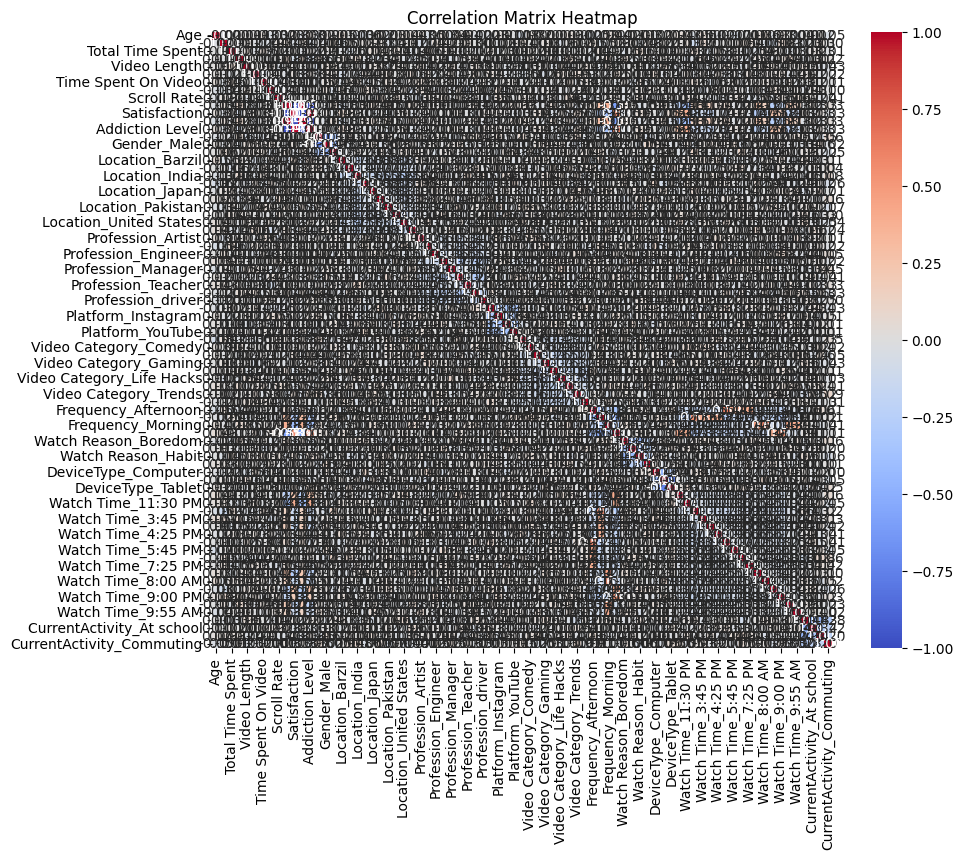

In [21]:
# Convert non-numeric columns to numeric using one-hot encoding
df_numeric = pd.get_dummies(df)

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()